<a href="https://colab.research.google.com/github/anoopsanka/retinal_oct/blob/main/notebooks/03a-OCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd drive/MyDrive/OCT_Project/

/content/drive/MyDrive/OCT_Project


In [ ]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/rscbjbr9sj-3.zip

--2020-12-28 22:52:52--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/rscbjbr9sj-3.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.53.3
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.53.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8432836958 (7.9G) [application/octet-stream]
Saving to: ‘rscbjbr9sj-3.zip’

rscbjbr9sj-3.zip    100%[===================>]   7.85G  71.4MB/s    in 1m 54s  

2020-12-28 22:54:47 (70.2 MB/s) - ‘rscbjbr9sj-3.zip’ saved [8432836958/8432836958]



In [ ]:
!unzip rscbjbr9sj-3.zip
!unzip ZhangLabData.zip

Streaming output truncated to the last 5000 lines.
  inflating: CellData/OCT/train/DME/DME-778975-125.jpeg  
  inflating: CellData/OCT/train/DME/DME-258763-26.jpeg  
  inflating: CellData/OCT/train/DME/DME-8457431-23.jpeg  
  inflating: CellData/OCT/train/DME/DME-3304080-55.jpeg  
  inflating: CellData/OCT/train/DME/DME-5006393-70.jpeg  
  inflating: CellData/OCT/train/DME/DME-5091309-15.jpeg  
  inflating: CellData/OCT/train/DME/DME-3064922-181.jpeg  
  inflating: CellData/OCT/train/DME/DME-8525575-184.jpeg  
  inflating: CellData/OCT/train/DME/DME-5143281-26.jpeg  
  inflating: CellData/OCT/train/DME/DME-6737988-35.jpeg  
  inflating: CellData/OCT/train/DME/DME-3064922-202.jpeg  
  inflating: CellData/OCT/train/DME/DME-3531101-20.jpeg  
  inflating: CellData/OCT/train/DME/DME-3157783-58.jpeg  
  inflating: CellData/OCT/train/DME/DME-258763-41.jpeg  
  inflating: CellData/OCT/train/DME/DME-30521-85.jpeg  
  inflating: CellData/OCT/train/DME/DME-5489583-15.jpeg  
  inflating: CellData/

In [ ]:
import tensorflow as tf

In [ ]:
# seed = 42
# val_split   = 0.1
# train_split = 1 - val_split
# batch_size = 32

# ds_val = tf.keras.preprocessing.image_dataset_from_directory(
#     'CellData/OCT/train',
#     labels="inferred",
#     color_mode="rgb",
#     batch_size=batch_size,
#     image_size=(224, 224),
#     shuffle=True,
#     seed=seed,
#     validation_split=val_split,
#     subset='validation',
#     interpolation="bilinear",
#     follow_links=False,
#     )
# ds_train = tf.keras.preprocessing.image_dataset_from_directory(
#     'CellData/OCT/train',
#     labels="inferred",
#     color_mode="rgb",
#     batch_size=batch_size,
#     image_size=(224, 224),
#     shuffle=True,
#     seed=seed,
#     validation_split=val_split,
#     subset='training',
#     interpolation="bilinear",
#     follow_links=False,
#     )

# ds_test = tf.keras.preprocessing.image_dataset_from_directory(
#     'CellData/OCT/test',
#     labels="inferred",
#     color_mode="rgb",
#     batch_size=batch_size,
#     image_size=(224, 224),
#     shuffle=True,
#     seed=seed,
#     interpolation="bilinear",
#     follow_links=False,
#     )

# IMG_SIZE=224
# def augment(image,label):
#   image, label = resize_and_rescale(image, label)
#   # Add 6 pixels of padding
#   image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6) 
#    # Random crop back to the original size
#   image = tf.image.random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3])
#   image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness
#   image = tf.clip_by_value(image, 0, 1)
#   return image, label

# def resize_and_rescale(image, label):
#   image = tf.cast(image, tf.float32)
#   image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
#   image = (image / 255.0)
#   return image, label

# AUTOTUNE = tf.data.experimental.AUTOTUNE
# ds_train = ds_train.unbatch().map(augment).batch(batch_size).prefetch(buffer_size=AUTOTUNE)
# ds_val   = ds_val.prefetch(buffer_size=AUTOTUNE)
# ds_test  = ds_test.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    zoom_range=0.3,
    horizontal_flip=True, 
    validation_split=0.01)

test_datagen = ImageDataGenerator()

In [ ]:
batch_size = 16
seed = 42
tf.random.set_seed(seed)


train_ds = train_datagen.flow_from_directory('CellData/OCT/train', 
                                             target_size=(224,224), 
                                             subset='training',
                                             class_mode="categorical",
                                             seed=seed, 
                                             interpolation='bilinear',
                                             batch_size=batch_size)

val_ds   = train_datagen.flow_from_directory('CellData/OCT/train', 
                                             target_size=(224,224), 
                                             subset='validation',
                                             class_mode="categorical",
                                             seed=seed, 
                                             interpolation='bilinear',
                                             batch_size=batch_size)

test_ds = test_datagen.flow_from_directory('CellData/OCT/test',
                                           class_mode="categorical",
                                           target_size=(224,224),
                                           batch_size=batch_size)

Found 107227 images belonging to 4 classes.
Found 1082 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def view_image(ds):
    image, label = next(iter(ds)) # extract 1 batch from the dataset
    image = image #.numpy()
    label = label #.numpy()

    fig = plt.figure(figsize=(22, 22))
    for i in range(16):
        ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
        ax.imshow(image[i].astype(np.int32))
        ax.set_title(f"Label: {label[i]}")
    return image 

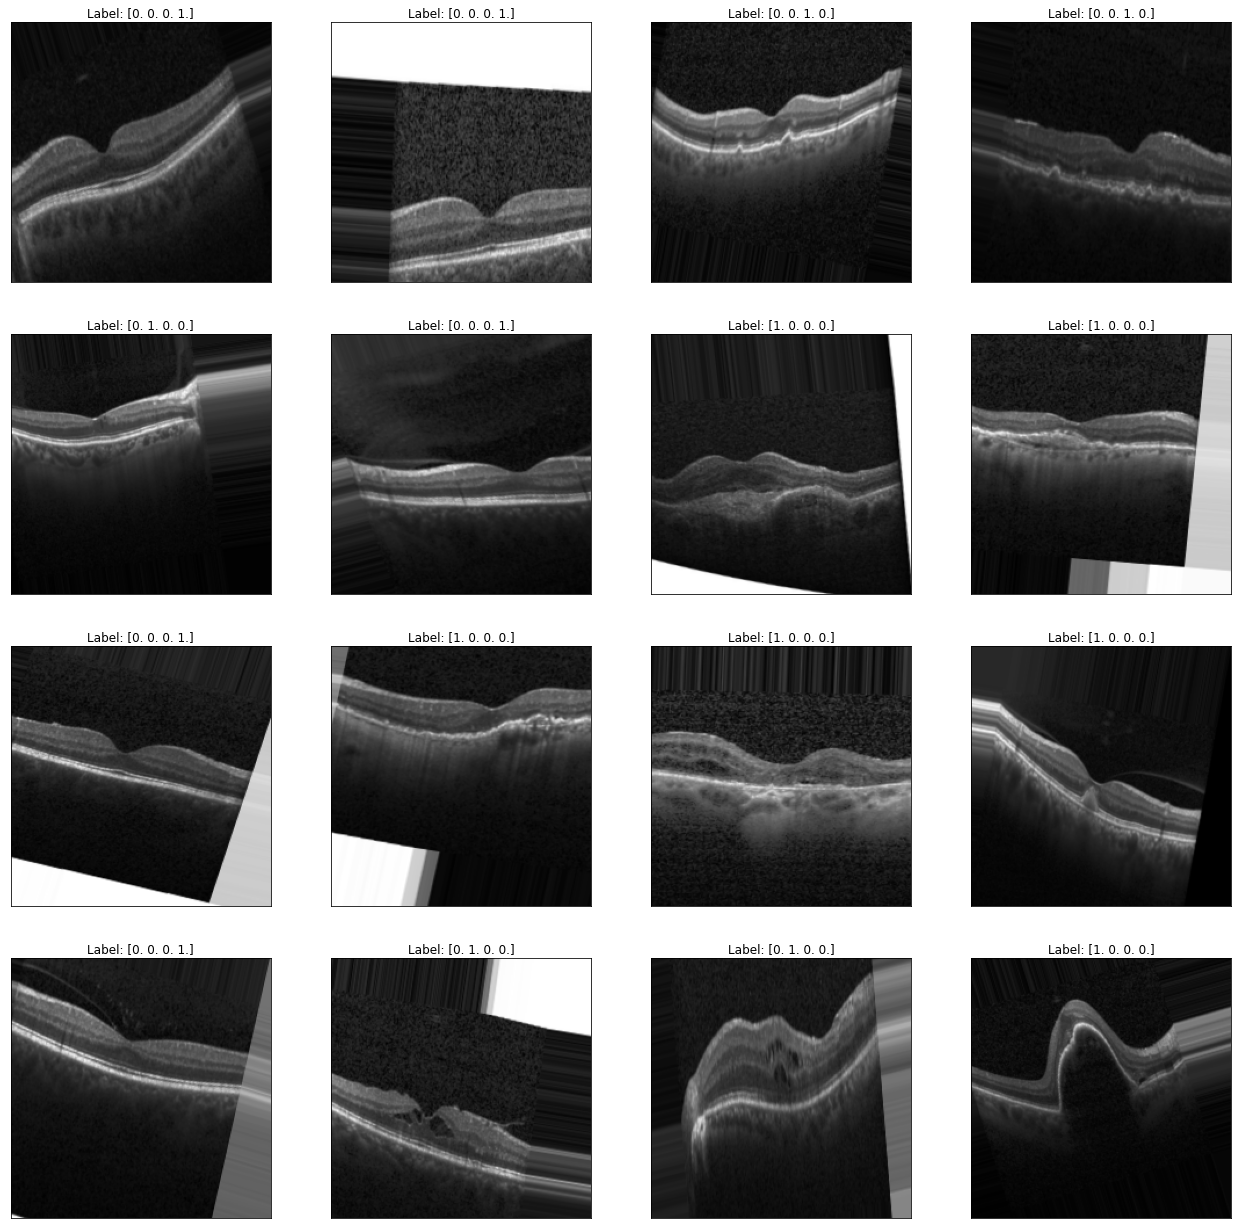

In [ ]:
img = view_image(train_ds)

In [ ]:
def create_basemodel(base_model='resnet', 
                     input_shape=(224,224,3),
                     output_units=4):
  
  if base_model == 'resnet':
    preprocess = tf.keras.applications.resnet_v2.preprocess_input
    base_model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet')
  elif base_model == 'xception':
    preprocess = tf.keras.applications.xception.preprocess_input
    base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet')
  elif base_model == 'inception':
    preprocess = tf.keras.layers.Lambda(lambda x: x)
    base_model = tf.kaers.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet')
  else:
    raise f"{base_model} not supported, choose from ['resnet', 'xception', 'inception']"

  base_model.trainable = False

  inputs = tf.keras.layers.Input(input_shape)
  pool    = tf.keras.layers.GlobalAveragePooling2D()
  flatten = tf.keras.layers.Flatten()

  softmax   = tf.keras.layers.Dense(output_units, activation='softmax')

  x = inputs
  x = preprocess(x)
  x = base_model(x)
  x = pool(x)
  x = flatten(x)
  out = softmax(x)

  return tf.keras.Model(inputs=inputs, outputs=out)

In [ ]:
import os

# simple version for working with CWD
print(len([name for name in os.listdir('CellData/OCT/train/CNV')]))
print(len([name for name in os.listdir('CellData/OCT/train/DME')]))
print(len([name for name in os.listdir('CellData/OCT/train/DRUSEN')]))
print(len([name for name in os.listdir('CellData/OCT/train/NORMAL')]))

37205
11348
8616
51140


In [ ]:
class_count = np.bincount(train_ds.classes)

# Compute Class Weight

In [ ]:
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
class_weights = compute_class_weight('balanced', [0, 1, 2, 3], train_ds.classes)
class_weights = {i: w for i, w in enumerate(class_weights)}

In [ ]:
class_weights

{0: 0.7277916542231151,
 1: 2.3860035603026257,
 2: 3.142643610785463,
 3: 0.5294742143830611}

# Feature Extraction

In [ ]:
resnet_base = create_basemodel('resnet')

metrics = ['accuracy']
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', ),
             tf.keras.callbacks.ModelCheckpoint(filepath='resnet_model.{epoch:02d}-{val_loss:.2f}.h5'),]
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
resnet_base.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy', 
                    metrics=metrics)

94674944/94668760 [==============================] - 2s 0us/step


In [ ]:
resnet_base.fit(train_ds,
                validation_data=val_ds,
                steps_per_epoch= train_ds.samples // batch_size,
                callbacks=callbacks,
                class_weight=class_weights, 
                epochs=20)

Epoch 1/20
6701/6701 [==============================] - 2820s 419ms/step - loss: 0.7829 - accuracy: 0.7285 - val_loss: 0.4981 - val_accuracy: 0.8161
Epoch 2/20
6701/6701 [==============================] - 2809s 419ms/step - loss: 0.6317 - accuracy: 0.7898 - val_loss: 0.5852 - val_accuracy: 0.7708
Epoch 3/20
6701/6701 [==============================] - 2742s 409ms/step - loss: 0.6122 - accuracy: 0.7982 - val_loss: 0.5104 - val_accuracy: 0.8133
Epoch 4/20
6701/6701 [==============================] - 2685s 401ms/step - loss: 0.6014 - accuracy: 0.8029 - val_loss: 0.3962 - val_accuracy: 0.8494
Epoch 5/20
6701/6701 [==============================] - 2435s 363ms/step - loss: 0.6024 - accuracy: 0.8056 - val_loss: 0.5969 - val_accuracy: 0.7717
Epoch 6/20
6701/6701 [==============================] - 2282s 341ms/step - loss: 0.5913 - accuracy: 0.8063 - val_loss: 0.5297 - val_accuracy: 0.7994
Epoch 7/20
6701/6701 [==============================] - 2419s 361ms/step - loss: 0.5926 - accuracy: 0.8062

In [ ]:
resnet_base.evaluate(test_ds)

63/63 [==============================] - 9s 145ms/step - loss: 0.2619 - accuracy: 0.8920


[0.26191532611846924, 0.8920000195503235]